# HW3: Netflix Data Analysis

In this homework assignment, you will analyze the netflix prize data. The data consist of 100,480,50 movie ratings on a scale from 0 to 5 stars. The reveiws are distributed across 17,770 movies and 480,189. We have provided the training data as a sparse matrix where the row corresponds to the movie ID and the column corresponds to the user ID. A seperate file contains the title and year of release for each movie. The original, raw data consists of multiple lists of tuples; each list is a seperate movie and each tuple is User ID, Rating, and Rating Year. 
The original data can be downloaded here: https://archive.org/download/nf_prize_dataset.tar
Further information about the netflix prize is available online: 
https://en.wikipedia.org/wiki/Netflix_Prize
https://www.netflixprize.com/

# Import and IMDB Scraping (Run First Always)

In [3]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import scipy.sparse
from bs4 import BeautifulSoup
import requests
import random
import math
import time

import matplotlib.pyplot as plt

In [341]:
# # This file consists of titles and release years associated with each ID
# movie_titles = pd.read_csv('movie_titles.txt', header = None, names = ['ID','Year','Name'], encoding='latin-1')
# movie_titles['Marked'] = False
# print(movie_titles.head())

# # THIS CELL IS ONLY RUN THE FIRST TIME FOR IMDB SCRAPING

          ID  Year                                         Name
4387    4388   NaN      Ancient Civilizations: Rome and Pompeii
4793    4794   NaN  Ancient Civilizations: Land of the Pharaohs
7240    7241   NaN     Ancient Civilizations: Athens and Greece
10781  10782   NaN                       Roti Kapada Aur Makaan
15917  15918   NaN                      Hote Hote Pyaar Ho Gaya
16677  16678   NaN                              Jimmy Hollywood
17666  17667   NaN                           Eros Dance Dhamaka


## IMDB Scraping (Run First Always)

In [146]:
# for index, row in movie_titles.iterrows():
#     if not movie_titles.loc[index, 'Marked']:
#         if not pd.isnull(row['Year']):
#             quer = "http://www.imdb.com/find?q=" + row['Name'] + "+AND+" + str(int(row['Year'])) + "&s=all"
#         else:
#             quer = "http://www.imdb.com/find?q=" + row['Name'] + "&s=all"
#         page = requests.get(quer)

#         soup = BeautifulSoup(page.content, "html.parser")

#         tab = soup.find('table', class_="findList")

#         if tab != None:
#             children = tab.findChildren('a')
#             directmovie = "http://www.imdb.com" + children[0].get('href')

#             moviepage = requests.get(directmovie)

#             moviesoup = BeautifulSoup(moviepage.content, "html.parser")

#             rating = moviesoup.find('span', itemprop="ratingValue")
#             if rating != None:
#                 movie_titles.loc[index, 'DBRating'] = rating.text.strip()

#             ratingcount = moviesoup.find('span', itemprop="ratingCount")
#             if ratingcount != None:
#                 movie_titles.loc[index, 'DBRatingCount'] = ratingcount.text.strip()

#             genres = moviesoup.find_all('span', itemprop="genre")
#             if genres != []:
#                 movie_titles.loc[index, 'DBGenre1'] = genres[0].text.strip()
#                 if len(genres) > 1:
#                     movie_titles.loc[index, 'DBGenre2'] = genres[1].text.strip()
#                 if len(genres) > 2:
#                     movie_titles.loc[index, 'DBGenre3'] = genres[2].text.strip()
            
#             length = moviesoup.find('time', itemprop="duration")
#             if length != None:
#                 tmin = 0
#                 length = length.text.strip()
#                 lengths = length.split()
#                 for l in lengths:
#                     if l.endswith("h"):
#                         tmin += 60 * int(l[:len(l) - 1])
#                     elif l.endswith("min"):
#                         tmin += int(l[:len(l) - 3])
#                 movie_titles.loc[index, 'DBRuntimeMin'] = tmin
            
#             contrate = moviesoup.find('meta', itemprop="contentRating")
#             if contrate != None:
#                 movie_titles.loc[index, 'DBContentRating'] = contrate['content']
                
#         movie_titles.loc[index, 'Marked'] = True;

In [353]:
# movie_titles[movie_titles['Marked']]

,ID,Year,Name,Marked,DBRating,DBRatingCount,DBGenre1,DBGenre2,DBGenre3,DBRuntimeMin,DBContentRating
0,1,2003.0,Dinosaur Planet,True,7.7,384.0,Documentary,Animation,Family,50.0,0
1,2,2004.0,Isle of Man TT 2004 Review,True,0.0,NaN,0,0,0,0.0,0
2,3,1997.0,Character,True,0.0,NaN,Documentary,Short,0,0.0,0
3,4,1994.0,Paula Abdul's Get Up & Dance,True,8.7,9.0,Family,0,0,54.0,UNRATED
4,5,2004.0,The Rise and Fall of ECW,True,8.6,1215.0,Documentary,Sport,0,360.0,TV-MA
5,6,1997.0,Sick,True,7.6,1414.0,Documentary,0,0,90.0,NOT RATED
6,7,1992.0,8 Man,True,5.0,56.0,Action,Sci-Fi,0,83.0,0
7,8,2004.0,What the #$*! Do We Know!?,True,0.0,NaN,Comedy,0,0,0.0,0
8,9,1991.0,Class of Nuke 'Em High 2,True,4.2,1634.0,Comedy,Horror,Sci-Fi,90.0,R
9,10,2001.0,Fighter,True,7.7,62.0,Action,0,0,0.0,0


In [398]:
# movie_titles = movie_titles.fillna(0)
# movie_titles['DBRating'] = movie_titles['DBRating'].astype('float64')
# movie_titles['DBRatingCount'] = movie_titles['DBRatingCount'].str.replace(',', '')
# movie_titles['DBRatingCount'] = movie_titles['DBRatingCount'].astype('float64')

In [354]:
# movie_titles.dtypes

ID                   int64
Year               float64
Name                object
Marked                bool
DBRating           float64
DBRatingCount      float64
DBGenre1            object
DBGenre2            object
DBGenre3            object
DBRuntimeMin       float64
DBContentRating     object
dtype: object

In [355]:
# movie_titles.to_csv("movie_titles_wrg.csv")

### Import from Exported Scrape Data (to save DataFrame externally)

In [4]:
movie_titles = pd.read_csv('movie_titles_wrg.csv', encoding='latin-1', index_col=0)

## Ratings and Test Array Generator (Run First Always)

In [6]:
# This file is a sparse matrix of movies by user, with each element a rating (1-5) or nonresponse (0)
ratings_csr = scipy.sparse.load_npz('netflix_full_csr.npz')
print(ratings_csr.shape)

(17771, 2649430)


In [7]:
# array of indices of nonzero elements
ratingsnz_inds = ratings_csr.nonzero()

print(ratingsnz_inds[0])
print(ratingsnz_inds[1])
print(len(ratingsnz_inds[0]))
print(len(ratingsnz_inds[1]))

[    1     1     1 ..., 17770 17770 17770]
[    915    2442    3321 ..., 2631551 2639973 2640999]
100479926
100479926


In [18]:
# function to generate random test set of size k
def randTestSetGen(k):
    indices = random.sample(range(len(ratingsnz_inds[0])), k)
    
    test_movie = [ratingsnz_inds[0][i] for i in indices]
    test_user = [ratingsnz_inds[1][i] for i in indices]
     
    ratings_csr_test = ratings_csr.copy()
        
    for a, b in zip(test_movie, test_user):
        ratings_csr_test[a,b] = 0
    
    return ratings_csr_test, list(zip(test_movie, test_user))

In [9]:
# function that calculates error between two ratings matrices at specific indices
def errorCalc(testItems, predicted):
    residuals = []

    actualRatings = [ratings_csr[point[0],point[1]] for point in testItems]
    predictRatings = [predicted[point[0],point[1]] for point in testItems]
    
    residuals = [act - pre for act, pre in zip(actualRatings, predictRatings)]

    print("Average absolute residual: " + str(np.mean(np.absolute(residuals))))
    print("Root mean square residual: " + str(math.sqrt(np.mean(np.square(residuals)))))

In [269]:
# function that calculates error between ratings matrix and reduced prediction matrix
def errorCalcReduced(testItems, predictReduced):
    residuals = []
    
    r = 0
    
    actualRatings = [ratings_csr[point[0],point[1]] for point in testItems]
    predictRatings = [predictReduced[i,i] for i in range(0,len(predictReduced))]
    
    residuals = [act - pre for act, pre in zip(actualRatings, predictRatings)]
    
    print("Average absolute residual: " + str(np.mean(np.absolute(residuals))))
    print("Root mean square residual: " + str(math.sqrt(np.mean(np.square(residuals)))))

# Baseline imputation using means

In [249]:
# impute with mean rating by user j, else mean rating by all users on all movies

start_time = time.time()
n = 10000 # number of test items
working, testers = randTestSetGen(n)

users_hmratings = working.getnnz(axis=0)
useravgs = working.sum(axis=0).flatten() / users_hmratings

allMeanRating = working.sum() / working.count_nonzero()

count = 0

for tester in testers:
    if users_hmratings[tester[1]] > 0: # impute mean rating given by a user
        working[tester[0],tester[1]] = useravgs[0,tester[1]]
        count += 1
    else: # impute mean rating given by all users
        working[tester[0],tester[1]] = allMeanRating
        
errorCalc(testers, working)
print('Time to predict (' + str(n) + '): ' + str(time.time() - start_time))
print('Proportion predicted using mean by user:  ' + str(count/n))

C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Average absolute residual: 0.801987
Root mean square residual: 0.9999509143703279
Time to predict (10000): 13.457824230194092
Proportion predicted using mean by user:  1.0


In [250]:
# impute with mean rating of movie i, else mean rating by all users on all movies

start_time = time.time()
n = 10000 # number of test items
working, testers = randTestSetGen(n)

movies_hmusers = working.getnnz(axis=1)
movieavgs = working.sum(axis=1).flatten() / movies_hmusers

allMeanRating = working.sum() / working.count_nonzero()

count = 0

for tester in testers:
    if movies_hmusers[tester[0]] > 0: # impute mean rating given for a movie
        working[tester[0],tester[1]] = movieavgs[0,tester[0]]
        count += 1
    else: # impute mean rating given by all users
        working[tester[0],tester[1]] = allMeanRating
        
errorCalc(testers, working)
print('Time to predict (' + str(n) + '): ' + str(time.time() - start_time))
print('Proportion predicted using mean by movie:  ' + str(count/n))

C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Average absolute residual: 0.809272
Root mean square residual: 1.0125775319308055
Time to predict (10000): 8.235623121261597
Proportion predicted using mean by movie:  1.0


In [265]:
# impute with user mean scaled by (all user avg of that movie/all user avg of all other movies watched by user)

start_time = time.time()
n = 1000 # number of test items
working, testers = randTestSetGen(n)

count = 0

allMeanRating = working.sum() / working.count_nonzero()


users_hmratings = working.getnnz(axis=0)
useravgs = working.sum(axis=0).flatten() / users_hmratings

movies_hmusers = working.getnnz(axis=1)
movieavgs = working.sum(axis=1).flatten() / movies_hmusers

allMeanRating = working.sum() / working.count_nonzero()
imdballavg = (movie_titles['DBRating'] * movie_titles['DBRatingCount']).mean() / movie_titles['DBRatingCount'].mean()

for tester in testers:
    if users_hmratings[tester[1]] > 0 and movies_hmusers[tester[0]] > 0: # only if user has rated other movies to determine avg user rating AND movie has been rated by other users
        usersOtherMovies = working[:,tester[1]].nonzero()[0]
        working[tester[0],tester[1]] = useravgs[0,tester[1]] * movieavgs[0,tester[0]] / np.average(movieavgs[0,usersOtherMovies])
        count += 1
        
    elif users_hmratings[tester[1]] > 0: # else impute user mean
        working[tester[0],tester[1]] = useravgs[0,tester[1]]
        
    else: # impute mean rating given by all users
        working[tester[0],tester[1]] = allMeanRating

errorCalc(testers, working)
print('Time to predict (' + str(n) + '): ' + str(time.time() - start_time))
print('Proportion predicted using scaled movie mean:  ' + str(count/n))

C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Average absolute residual: 0.736024
Root mean square residual: 0.9460950402551069
Time to predict (1000): 150.25939011573792
Proportion predicted using scaled movie mean:  1.0


In [266]:
# impute with movie mean scaled by (user avg/avgs of other users who rated that movie)

start_time = time.time()
n = 1000 # number of test items
working, testers = randTestSetGen(n)

count = 0

allMeanRating = working.sum() / working.count_nonzero()


users_hmratings = working.getnnz(axis=0)
useravgs = working.sum(axis=0).flatten() / users_hmratings

movies_hmusers = working.getnnz(axis=1)
movieavgs = working.sum(axis=1).flatten() / movies_hmusers

allMeanRating = working.sum() / working.count_nonzero()
imdballavg = (movie_titles['DBRating'] * movie_titles['DBRatingCount']).mean() / movie_titles['DBRatingCount'].mean()

for tester in testers:
    if users_hmratings[tester[1]] > 0 and movies_hmusers[tester[0]] > 0: # only if user has rated other movies to determine avg user rating AND movie has been rated by other users
        moviesOtherUsers = working[tester[0],:].nonzero()[1]
        working[tester[0],tester[1]] = movieavgs[0,tester[0]] * useravgs[0,tester[1]] / np.average(useravgs[0,moviesOtherUsers])
        count += 1
        
    elif movies_hmusers[tester[0]] > 0: # else impute movie mean
        working[tester[0],tester[1]] = movieavgs[0,tester[0]]
        
    else: # impute mean rating given by all users
        working[tester[0],tester[1]] = allMeanRating

errorCalc(testers, working)
print('Time to predict (' + str(n) + '): ' + str(time.time() - start_time))
print('Proportion predicted using scaled movie mean:  ' + str(count/n))

C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\Adam Chang\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Average absolute residual: 0.734048
Root mean square residual: 0.9157048656016499
Time to predict (1000): 8.945653438568115
Proportion predicted using scaled movie mean:  1.0


# Predicting using TruncatedSVD

A common methods for analyzing large datasets is dimension reduction. Here we perform a truncated SVD suited for sparse datasets and analyze which movies are associated with different latent dimensions

In [267]:
from sklearn.decomposition import TruncatedSVD

In [271]:
def tSVDpredict(componentsArray, testSize):
    for n_components in componentsArray:    
        
        svd = TruncatedSVD(n_components = n_components)
        working, testers = randTestSetGen(testSize)
        Z = svd.fit_transform(working)
        
        keepmovies = [tester[0] for tester in testers]
        keepusers = [tester[1] for tester in testers]

        ratings_csr_sample = working[keepmovies]
        
        Y = svd.transform(ratings_csr_sample)
        pred = svd.inverse_transform(Y)
        
        pred = pred[:,keepusers]
        predScaled =  1 + 4 * (pred - np.amin(pred))/(np.amax(pred) - np.amin(pred))
        
        print("For test size = " + str(testSize) + " and components = " + str(n_components))
        errorCalcReduced(testers, predScaled)
        print('Time to fit and predict (' + str(n) + '): ' + str(time.time() - start_time))


In [280]:
px = tSVDpredict([10,50,100,200],1000)

For test size = 1000 and components = 10
Average absolute residual: 1.31718
Root mean square residual: 1.536153377291025
Time to fit and predict (1000): 3952.7193109989166


KeyboardInterrupt: 

# Predicting Using NMF

In [271]:
def NMFpredict(componentsArray, testSize):
    for n_components in componentsArray:    
        
        nmf = NMF(n_components = n_components)
        working, testers = randTestSetGen(testSize)
        
        n_viewers = int(2649430 / n_components)
        random_sample_viewers = np.random.choice(2649430, size = n_viewers)
        ratings_small = ratings_csr[:,random_sample_viewers]
        
        Z = nmf.fit_transform(ratings_small)
        
        keepmovies = [tester[0] for tester in testers]
        keepusers = [tester[1] for tester in testers]

        ratings_csr_sample = working[keepmovies]
        
        Y = nmf.transform(ratings_csr_sample)
        pred = nmf.inverse_transform(Y)
        
        pred = pred[:,keepusers]
        predScaled =  1 + 4 * (pred - np.amin(pred))/(np.amax(pred) - np.amin(pred))
        
        print("For test size = " + str(testSize) + " and components = " + str(n_components))
        errorCalcReduced(testers, predScaled)
        print('Time to fit and predict (' + str(n) + '): ' + str(time.time() - start_time))


In [ ]:
px = NMFpredict([10,50,100,200],1000)

For test size = 1000 and components = 10
Average absolute residual: 1.31718
Root mean square residual: 1.536153377291025
Time to fit and predict (1000): 3952.7193109989166


# K-Means

## K-Means using all numerical data (year, movie rating, rating count, runtime) from IMDB

In [9]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [206]:
def kClusterExpand(karray, df, topN, dropcols):
    global movie_titles
    mt = movie_titles.copy()
    
    mt = mt.sort_values(['DBRatingCount'], ascending=False)   
    mt = mt.drop(dropcols, axis=1)
    
    for k in karray:
        km = KMeans(n_clusters=k).fit(df)
        
        cluster_map = pd.DataFrame()
        cluster_map['ID'] = df.index.values + 1
        cluster_map['cluster'] = km.labels_
        
        for i in range(0,k):
            print("(K = " + str(k) + ") Cluster " + str(i) + ": " + str(topN) + " Most Rated Movies")
            c = cluster_map[cluster_map['cluster'] == i]['ID']
            
            #census_df.iloc[census_df['COUNTY'].argsort()[-3:]]


            print(mt[mt['ID'].isin(c)].head(3))
            print("---------------------------------------")

In [164]:
def kMeanOptimization(karray, n, df):
    for k in karray:
        print("For test size " + str(n) + " with k = " + str(k) + ":")
        start_time = time.time()
        km = KMeans(n_clusters=k).fit(df)
    
        cluster_map = pd.DataFrame()
        cluster_map['ID'] = df.index.values + 1
        cluster_map['cluster'] = km.labels_
     
        working, testers = randTestSetGen(n)

        users_hmratings = working.getnnz(axis=0)
        movies_hmusers = working.getnnz(axis=1)

        allMeanRating = working.sum() / working.count_nonzero()
        
        countInKM = 0

        for tester in testers:
            if users_hmratings[tester[1]] > 0 and tester[0] in cluster_map['ID'].values: # if user has rated other movies
                clusNum = int(cluster_map[cluster_map['ID'] == tester[0]]['cluster'])
                clusToSearch = cluster_map[cluster_map['cluster'] == clusNum]['ID'].values

                userHasRated = working[:,tester[1]].nonzero()[0]

                moviesRatedInSameCluster = set(userHasRated) & set(clusToSearch)

                if len(moviesRatedInSameCluster) > 0:
                    avgRating = 0

                    for movieID in moviesRatedInSameCluster:
                        avgRating += working[movieID, tester[1]]

                    avgRating = avgRating / len(moviesRatedInSameCluster)

                    working[tester[0],tester[1]] = avgRating
                    
                    countInKM += 1

                else:
                    working[tester[0],tester[1]] = working.getcol(tester[1]).sum() / users_hmratings[tester[1]]

            elif users_hmratings[tester[1]] > 0:
                working[tester[0],tester[1]] = working.getcol(tester[1]).sum() / users_hmratings[tester[1]]
                
            elif movies_hmusers[tester[0]]  > 0: # impute mean rating given for a movie
                working[tester[0],tester[1]] = working.getrow(tester[0]).sum() / movies_hmusers[tester[0]] 
            
            else: # impute mean rating given by all users
                working[tester[0],tester[1]] = allMeanRating

        errorCalc(testers, working)
        print('Time to fit and predict (' + str(n) + '): ' + str(time.time() - start_time))
        print('Proportion predicted using KM:  ' + str(countInKM/n))
        print()

In [135]:
# process movie title information array for clusters

movie_titles_prekm = movie_titles[['Year','DBRating','DBRatingCount','DBRuntimeMin']]
movie_titles_prekm = movie_titles_prekm.replace({0:np.nan})
movie_titles_prekm = movie_titles_prekm.dropna(axis = 0, how = 'any')

save_index = movie_titles_prekm.index.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(movie_titles_prekm)
movie_titles_prekm = pd.DataFrame(scaled)
movie_titles_prekm.loc[:,3] *= 0.2
movie_titles_prekm.index = save_index

In [14]:
kMeanOptimization((5,10,25,50,75,100,200,500),1000, movie_titles_prekm)

For test size 1000 with k = 5:
Average absolute residual: 0.758658
Root mean square residual: 0.9704119976832779
Time to fit and predict (1000): 171.79392981529236
Proportion predicted using KM:  0.77

For test size 1000 with k = 10:
Average absolute residual: 0.78097
Root mean square residual: 0.9898357002635515
Time to fit and predict (1000): 169.1558482646942
Proportion predicted using KM:  0.75

For test size 1000 with k = 25:
Average absolute residual: 0.774108
Root mean square residual: 0.9823831660568
Time to fit and predict (1000): 169.15712141990662
Proportion predicted using KM:  0.761

For test size 1000 with k = 50:
Average absolute residual: 0.769181
Root mean square residual: 0.9970880370474813
Time to fit and predict (1000): 172.86700558662415
Proportion predicted using KM:  0.739

For test size 1000 with k = 75:
Average absolute residual: 0.811421
Root mean square residual: 1.0365813612005412
Time to fit and predict (1000): 177.4802680015564
Proportion predicted using K

In [273]:
km_num_rmse = (0.9704119976832779, 0.9898357002635515, 0.9823831660568, 0.9970880370474813, 1.0365813612005412, 1.0070339418882819, 1.0129190048908427, 1.065418610484638)

km_num_ttp = (171.79392981529236, 169.1558482646942, 169.15712141990662, 172.86700558662415, 177.4802680015564, 185.75413036346436, 193.82946825027466, 221.23797154426575)

km_num_prop = (.77, .75, .761, .739, .741, .701, .647, .551)

In [207]:
kClusterExpand((5,20,50), movie_titles_prekm, 3, ['Marked','DBGenre1','DBGenre2','DBGenre3','DBContentRating'])

(K = 5) Cluster 0: 3 Most Rated Movies
        ID    Year                             Name  DBRating  DBRatingCount  \
7066  7067  2003.0  Charlie's Angels: Full Throttle       4.8       108222.0   
6908  6909  2004.0                             Spin       3.3        95746.0   
4930  4931  2004.0                         Catwoman       3.3        95745.0   

      DBRuntimeMin  
7066         106.0  
6908         104.0  
4930         104.0  
---------------------------------------
(K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year                                    Name  DBRating  \
9527    9528  1957.0                            12 Angry Men       8.9   
10831  10832  1960.0                                  Psycho       8.5   
13577  13578  1961.0  Rocky & Bullwinkle & Friends: Season 3       8.1   

       DBRatingCount  DBRuntimeMin  
9527        538220.0          96.0  
10831       492144.0         109.0  
13577       438604.0         120.0  
--------------------------------

(K = 50) Cluster 0: 3 Most Rated Movies
          ID    Year                            Name  DBRating  DBRatingCount  \
12148  12149  1997.0         Speed 2: Cruise Control       3.8        65613.0   
13233  13234  1997.0     Mortal Kombat: Annihilation       3.7        39901.0   
16555  16556  2000.0  Book of Shadows: Blair Witch 2       4.0        32261.0   

       DBRuntimeMin  
12148         121.0  
13233          95.0  
16555          90.0  
---------------------------------------
(K = 50) Cluster 1: 3 Most Rated Movies
          ID    Year                                Name  DBRating  \
15701  15702  1977.0  Close Encounters of the Third Kind       7.7   
2553    2554  1975.0       The Rocky Horror Picture Show       7.4   
13301  13302  1974.0                     Blazing Saddles       7.8   

       DBRatingCount  DBRuntimeMin  
15701       157714.0         138.0  
2553        115708.0         100.0  
13301       108430.0          93.0  
--------------------------------------

          ID    Year                 Name  DBRating  DBRatingCount  \
14483  14484  1988.0        The Naked Gun       7.6       128511.0   
13579  13580  1988.0  A Fish Called Wanda       7.6       116787.0   
2464    2465  1984.0   This Is Spinal Tap       8.0       114710.0   

       DBRuntimeMin  
14483          85.0  
13579         108.0  
2464           82.0  
---------------------------------------
(K = 50) Cluster 24: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount  DBRuntimeMin
5925    5926  1999.0    Fight Club       8.8      1553583.0         139.0
11063  11064  1994.0  Pulp Fiction       8.9      1515713.0         154.0
11282  11283  1994.0  Forrest Gump       8.8      1469706.0         142.0
---------------------------------------
(K = 50) Cluster 25: 3 Most Rated Movies
          ID    Year                                  Name  DBRating  \
15061  15062  1978.0                                Grease       7.2   
2188    2189  1981.0  The Hit

        ID    Year            Name  DBRating  DBRatingCount  DBRuntimeMin
7872  7873  2002.0     The Stalker       6.8       104221.0          96.0
5813  5814  2002.0  One Hour Photo       6.8       104221.0          96.0
104    105  2002.0        Obsessed       6.8       104221.0          96.0
---------------------------------------
(K = 50) Cluster 46: 3 Most Rated Movies
          ID    Year              Name  DBRating  DBRatingCount  DBRuntimeMin
16390  16391  2003.0               Sin       5.3       189592.0         103.0
3253    3254  2003.0         Daredevil       5.3       189589.0         103.0
6551    6552  2000.0  Charlie's Angels       5.5       156249.0          98.0
---------------------------------------
(K = 50) Cluster 47: 3 Most Rated Movies
          ID    Year                    Name  DBRating  DBRatingCount  \
12070  12071  1995.0                Mallrats       7.2       105279.0   
7233    7234  2000.0            Men of Honor       7.2        96918.0   
6218    621

## K-Means Using Genre Data

In [201]:
genre_dummies = pd.get_dummies(movie_genres, prefix=['Dummy','Dummy','Dummy'])
genre_dummies = genre_dummies.drop(['Dummy_0'], axis=1)

In [111]:
kMeanOptimizationGenre((5,10,25,50,75,100,200,500),1000,genre_dummies)

For test size 1000 with k = 5:
Average absolute residual: 0.83247
Root mean square residual: 1.0419677617106957
Time to fit and predict (1000): 165.18291521072388
Proportion predicted using KM:  0.996

For test size 1000 with k = 10:
Average absolute residual: 0.801315
Root mean square residual: 1.012109923868682
Time to fit and predict (1000): 160.5275478363037
Proportion predicted using KM:  0.995

For test size 1000 with k = 25:
Average absolute residual: 0.769463
Root mean square residual: 1.011603683939056
Time to fit and predict (1000): 157.15008544921875
Proportion predicted using KM:  0.978

For test size 1000 with k = 50:
Average absolute residual: 0.788736
Root mean square residual: 1.000911773817895
Time to fit and predict (1000): 164.33665013313293
Proportion predicted using KM:  0.956

For test size 1000 with k = 75:
Average absolute residual: 0.771039
Root mean square residual: 1.0098416504564376
Time to fit and predict (1000): 165.92703986167908
Proportion predicted usin

In [210]:
kClusterExpand((5,20,50), genre_dummies, 3, ['Marked','DBRating','DBRatingCount','DBRuntimeMin','DBContentRating','Year'])

(K = 5) Cluster 0: 3 Most Rated Movies
          ID                                           Name   DBGenre1  \
11063  11064                                   Pulp Fiction      Crime   
2451    2452  Lord of the Rings: The Fellowship of the Ring  Adventure   
14239  14240      Lord of the Rings: The Return of the King  Adventure   

      DBGenre2 DBGenre3  
11063    Drama        0  
2451     Drama  Fantasy  
14239    Drama  Fantasy  
---------------------------------------
(K = 5) Cluster 1: 3 Most Rated Movies
          ID                   Name     DBGenre1 DBGenre2 DBGenre3
4344    4345  Bowling for Columbine  Documentary    Crime    Drama
5447    5448     Jackass: The Movie  Documentary   Action   Comedy
16686  16687                 Baraka  Documentary        0        0
---------------------------------------
(K = 5) Cluster 2: 3 Most Rated Movies
          ID                               Name DBGenre1   DBGenre2 DBGenre3
14690  14691                         The Matrix   Action 

(K = 50) Cluster 0: 3 Most Rated Movies
          ID           Name DBGenre1 DBGenre2 DBGenre3
12470  12471         8 Mile    Drama    Music        0
7616    7617  Dirty Dancing    Drama    Music  Romance
13411  13412   Billy Elliot    Drama    Music  Romance
---------------------------------------
(K = 50) Cluster 1: 3 Most Rated Movies
          ID          Name DBGenre1  DBGenre2 DBGenre3
5990    5991      Sin City    Crime  Thriller        0
14868  14869  Blade Runner   Sci-Fi  Thriller        0
14417  14418      The Good  Western         0        0
---------------------------------------
(K = 50) Cluster 2: 3 Most Rated Movies
          ID                                               Name DBGenre1  \
16264  16265                  Star Wars: Episode IV: A New Hope   Action   
5581    5582      Star Wars: Episode V: The Empire Strikes Back   Action   
1904    1905  Pirates of the Caribbean: The Curse of the Bla...   Action   

        DBGenre2 DBGenre3  
16264  Adventure  Fantasy  

          ID                        Name DBGenre1  DBGenre2 DBGenre3
658      659  The Last House on the Left   Horror  Thriller        0
14645  14646                Pet Sematary   Horror  Thriller        0
12681  12682                    Candyman   Horror  Thriller        0
---------------------------------------
(K = 50) Cluster 41: 3 Most Rated Movies
          ID                 Name   DBGenre1 DBGenre2 DBGenre3
8643    8644  Catch Me If You Can  Biography    Crime    Drama
6220    6221        Donnie Brasco  Biography    Crime    Drama
16791  16792                 Blow  Biography    Crime    Drama
---------------------------------------
(K = 50) Cluster 42: 3 Most Rated Movies
          ID                           Name DBGenre1 DBGenre2 DBGenre3
14690  14691                     The Matrix   Action   Sci-Fi        0
8914    8915  Terminator 2: Extreme Edition   Action   Sci-Fi        0
467      468        The Matrix: Revolutions   Action   Sci-Fi        0
--------------------------

In [275]:
km_genre_rmse = (1.0419677617106957, 1.012109923868682, 1.011603683939056, 1.000911773817895, 1.0098416504564376, 1.025230060903479, 1.1255489175809352, 1.0785423797748506)

km_genre_ttp = (165.18291521072388, 160.5275478363037, 157.15008544921875, 164.33665013313293, 165.92703986167908, 167.16694569587708, 181.19364833831787, 209.86620020866394)

km_genre_prop = (.996, .995, .978, .956, .932, .923, .859, .813)

## K-Means Using Genre and Numerical Data

In [211]:
imdb_all = genre_dummies.copy()

In [212]:
imdb_all['Year'] = movie_titles_prekm.iloc[:,0]
imdb_all['Rating'] = movie_titles_prekm.iloc[:,1]
imdb_all['RCount'] = movie_titles_prekm.iloc[:,2]
imdb_all['Runtime'] = movie_titles_prekm.iloc[:,3]
imdb_all = imdb_all.dropna(axis = 0, how = 'any')

In [132]:
kMeanOptimizationDBAll((5,10,25,50,75,100,200,500),1000,imdb_all)

For test size 1000 with k = 5:
Average absolute residual: 0.823099
Root mean square residual: 1.0281865829065773
Time to fit and predict (1000): 161.09683179855347
Proportion predicted using KM:  0.749

For test size 1000 with k = 10:
Average absolute residual: 0.80042
Root mean square residual: 1.0144710734545552
Time to fit and predict (1000): 158.93174862861633
Proportion predicted using KM:  0.76

For test size 1000 with k = 25:
Average absolute residual: 0.793101
Root mean square residual: 1.0180667575314142
Time to fit and predict (1000): 163.08234429359436
Proportion predicted using KM:  0.745

For test size 1000 with k = 50:
Average absolute residual: 0.805671
Root mean square residual: 1.0386152523885839
Time to fit and predict (1000): 162.95363759994507
Proportion predicted using KM:  0.726

For test size 1000 with k = 75:
Average absolute residual: 0.806104
Root mean square residual: 1.04556226269657
Time to fit and predict (1000): 170.1053590774536
Proportion predicted usin

In [213]:
kClusterExpand((5,20,50), imdb_all, 3, ['Marked','DBContentRating'])

(K = 5) Cluster 0: 3 Most Rated Movies
          ID    Year                               Name  DBRating  \
14690  14691  1999.0                         The Matrix       8.7   
7289    7290  2000.0                       The Specials       8.5   
16264  16265  1977.0  Star Wars: Episode IV: A New Hope       8.6   

       DBRatingCount DBGenre1   DBGenre2 DBGenre3  DBRuntimeMin  
14690      1393609.0   Action     Sci-Fi        0         136.0  
7289       1124325.0   Action  Adventure    Drama         155.0  
16264      1047678.0   Action  Adventure  Fantasy         121.0  
---------------------------------------
(K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year                 Name  DBRating  DBRatingCount DBGenre1  \
5925    5926  1999.0           Fight Club       8.8      1553583.0    Drama   
11282  11283  1994.0         Forrest Gump       8.8      1469706.0    Drama   
17156  17157  1998.0  Saving Private Ryan       8.6      1022482.0    Drama   

      DBGenre2 DBGenre3 

(K = 50) Cluster 0: 3 Most Rated Movies
          ID    Year                                           Name  DBRating  \
2451    2452  2001.0  Lord of the Rings: The Fellowship of the Ring       8.8   
14239  14240  2003.0      Lord of the Rings: The Return of the King       8.9   
706      707  2003.0                                     The Return       8.9   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  DBRuntimeMin  
2451       1403566.0  Adventure    Drama  Fantasy         178.0  
14239      1384647.0  Adventure    Drama  Fantasy         201.0  
706        1384586.0  Adventure    Drama  Fantasy         201.0  
---------------------------------------
(K = 50) Cluster 1: 3 Most Rated Movies
          ID    Year              Name  DBRating  DBRatingCount DBGenre1  \
6028    6029  2001.0            Amelie       8.3       611401.0   Comedy   
8896    8897  1999.0  Friends & Lovers       8.9       586903.0   Comedy   
16222  16223  1958.0           Vertigo       8.3       294253.0

          ID    Year                             Name  DBRating  \
12917  12918  1997.0                     Men in Black       7.3   
14357  14358  1975.0  Monty Python and the Holy Grail       8.3   
4955    4956  1989.0       Back to the Future Part II       7.8   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  DBRuntimeMin  
12917       449118.0  Adventure   Comedy   Family          98.0  
14357       430641.0  Adventure   Comedy  Fantasy          91.0  
4955        392214.0  Adventure   Comedy   Sci-Fi         108.0  
---------------------------------------
(K = 50) Cluster 30: 3 Most Rated Movies
          ID    Year               Name  DBRating  DBRatingCount DBGenre1  \
14453  14454  2003.0  Kill Bill: Vol. 1       8.1       841523.0   Action   
456      457  2004.0  Kill Bill: Vol. 2       8.0       573774.0   Action   
7058    7059  2003.0            The Job       7.0       309219.0   Action   

      DBGenre2  DBGenre3  DBRuntimeMin  
14453    Crime  Thriller         111

In [274]:
km_dball_rmse = (1.0281865829065773, 1.0144710734545552, 1.0180667575314142, 1.0386152523885839, 1.04556226269657, 1.1037253931570823, 1.078242972733373, 1.04343760949403)

km_dball_ttp = (161.09683179855347, 158.93174862861633, 163.08234429359436, 162.95363759994507, 170.1053590774536, 170.61167120933533, 182.07704162597656, 216.48252367973328)

km_dball_prop = (.749, .76, .745, .726, .716, .698, .659, .586)

## All Pure K-Means Results

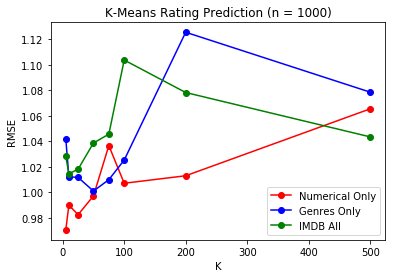

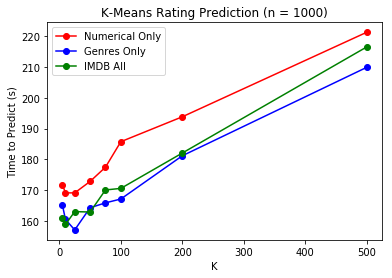

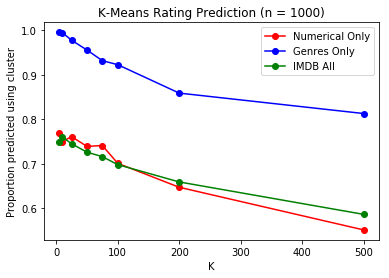

In [279]:
plt.plot((5,10,25,50,75,100,200,500), km_num_rmse, 'ro-', label='Numerical Only')
plt.plot((5,10,25,50,75,100,200,500), km_genre_rmse, 'bo-', label='Genres Only')
plt.plot((5,10,25,50,75,100,200,500), km_dball_rmse, 'go-', label='IMDB All')
plt.title('K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.plot((5,10,25,50,75,100,200,500), km_num_ttp, 'ro-', label='Numerical Only')
plt.plot((5,10,25,50,75,100,200,500), km_genre_ttp, 'bo-', label='Genres Only')
plt.plot((5,10,25,50,75,100,200,500), km_dball_ttp, 'go-', label='IMDB All')
plt.title('K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('Time to Predict (s)')
plt.legend()
plt.show()

plt.plot((5,10,25,50,75,100,200,500), km_num_prop, 'ro-', label='Numerical Only')
plt.plot((5,10,25,50,75,100,200,500), km_genre_prop, 'bo-', label='Genres Only')
plt.plot((5,10,25,50,75,100,200,500), km_dball_prop, 'go-', label='IMDB All')
plt.title('K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('Proportion predicted using cluster')
plt.legend()
plt.show()

# Truncated SVD + K-Means on lower-dimensional space

In [220]:
from sklearn.decomposition import TruncatedSVD

In [230]:
def tSVDkClusterExpand(componentsArray, karray, topN, dropcols):
    global movie_titles
    mt = movie_titles.copy()
    
    mt = mt.sort_values(['DBRatingCount'], ascending=False)   
    mt = mt.drop(dropcols, axis=1)
    
    for n_components in componentsArray:
        svd = TruncatedSVD(n_components = n_components)
        Z = svd.fit_transform(ratings_csr)
        
        for k in karray:
            km = KMeans(n_clusters=k).fit(Z)

            cluster_map = pd.DataFrame()
            cluster_map['ID'] = movie_titles.index.values + 1
            cluster_map['cluster'] = km.labels_[1:]

            for i in range(0,k):
                print("(" + str(n_components) + " components, K = " + str(k) + ") Cluster " + str(i) + ": " + str(topN) + " Most Rated Movies")
                c = cluster_map[cluster_map['cluster'] == i]['ID']

                #census_df.iloc[census_df['COUNTY'].argsort()[-3:]]


                print(mt[mt['ID'].isin(c)].head(3))
                print("---------------------------------------")

In [86]:
def tSVDkm(componentsArray, kArray, testSize):
    for n_components in componentsArray:
        
        
        
        svd = TruncatedSVD(n_components = n_components)
        working, testers = randTestSetGen(testSize)
        
        users_hmratings = working.getnnz(axis=0)
        movies_hmusers = working.getnnz(axis=1)
        allMeanRating = working.sum() / working.count_nonzero()
        
        svd_start_time = time.time()
        
        Z = svd.fit_transform(working)
        
        svd_time = time.time() - svd_start_time
        
        for k in kArray:
            print("For test size " + str(testSize) + " with " + str(n_components) + " components and k = " + str(k) + ":")
            p
            
            km = KMeans(n_clusters=k).fit(Z)
            
            clabels = pd.DataFrame(km.labels_)
            countInKM = 0
        
            for tester in testers:
                clusnum = int(clabels.loc[tester[0]])
                checkArray = clabels[clabels[0] == clusnum].index.values
                
                userHasRated = working[:,tester[1]].nonzero()[0]
                
                moviesRatedInSameCluster = set(userHasRated) & set(checkArray)
                
                if len(moviesRatedInSameCluster) > 0:
                    avgRating = 0

                    for movieID in moviesRatedInSameCluster:
                        avgRating += working[movieID, tester[1]]

                    avgRating = avgRating / len(moviesRatedInSameCluster)

                    working[tester[0],tester[1]] = avgRating
                    
                    countInKM += 1

                elif users_hmratings[tester[1]] > 0:
                    working[tester[0],tester[1]] = working.getcol(tester[1]).sum() / users_hmratings[tester[1]]
                elif movies_hmusers[tester[0]]  > 0: # impute mean rating given for a movie
                    working[tester[0],tester[1]] = working.getrow(tester[0]).sum() / movies_hmusers[tester[0]]
                else: # impute mean rating given by all users
                    working[tester[0],tester[1]] = allMeanRating
            
            errorCalc(testers, working)
            print('Time to fit and predict (including SVD) (' + str(testSize) + '): ' + str(time.time() - start_time + svd_time))
            print('Proportion predicted using KM:  ' + str(countInKM/testSize))
            print()

In [88]:
tSVDkm([10,50,100,500,1000,5000,10000],[5,10,25,50,75,100,200,500],1000)

For test size 1000 with 10 components and k = 5:
Average absolute residual: 0.77258
Root mean square residual: 0.9832725406432564
Time to fit and predict (including SVD) (1000): 229.7409806251526
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 10:
Average absolute residual: 0.749206
Root mean square residual: 0.9660154633419705
Time to fit and predict (including SVD) (1000): 231.76079845428467
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 25:
Average absolute residual: 0.728296
Root mean square residual: 0.9510401139067348
Time to fit and predict (including SVD) (1000): 227.20927262306213
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 50:
Average absolute residual: 0.715571
Root mean square residual: 0.9361410145805172
Time to fit and predict (including SVD) (1000): 224.0242326259613
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 75:
Average ab

MemoryError: 

In [89]:
tSVDkm([200],[5,10,25,50,75,100,200,500],1000)

For test size 1000 with 200 components and k = 5:
Average absolute residual: 0.755161
Root mean square residual: 0.943472561255822
Time to fit and predict (including SVD) (1000): 701.4299454689026
Proportion predicted using KM:  0.999

For test size 1000 with 200 components and k = 10:
Average absolute residual: 0.739847
Root mean square residual: 0.9209054600760371
Time to fit and predict (including SVD) (1000): 690.6115357875824
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 25:
Average absolute residual: 0.71332
Root mean square residual: 0.9131803575951407
Time to fit and predict (including SVD) (1000): 696.3607003688812
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 50:
Average absolute residual: 0.70588
Root mean square residual: 0.9081023457714776
Time to fit and predict (including SVD) (1000): 697.9344329833984
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 75:
Average

In [215]:
tsvdkm_10c_rmse = (0.9832725406432564, 0.9660154633419705, 0.9510401139067348, 0.9361410145805172, 0.9313425350938388, 0.9489991361776908, 0.9685251221064618, 0.9659005990904568)

tsvdkm_10c_ttp = (229.7409806251526, 231.76079845428467, 227.20927262306213, 224.0242326259613, 226.7826726436615, 230.02747535705566, 237.8937931060791, 262.22224950790405)

tsvdkm_10c_prop = (1,1,1,1,1,1,1,1)

tsvdkm_50c_rmse = (0.9747215007735707, 0.9643921509538433, 0.9513817150343605, 0.9435569919501977, 0.9465430896037074, 0.9698023771247044, 0.9531358812054983, 0.9426559131583142)

tsvdkm_50c_ttp = (320.22561025619507, 316.120050907135, 314.74270582199097, 318.1975235939026, 319.69832038879395, 326.1735842227936, 334.55816531181335, 376.08716583251953)

tsvdkm_50c_prop = (1,1,1,1,1,1,1,1)

tsvdkm_100c_rmse = (0.9476856676836319, 0.9473913364957287, 0.9325678787378009, 0.9358534658977726, 0.9253763528659634, 0.9175995429191681, 0.9184916853261023, 0.926939163713735)

tsvdkm_100c_ttp = (437.1654758453369, 431.4912314414978, 429.7956590652466, 432.6928434371948, 432.52923107147217, 436.74410820007324, 449.1769676208496, 490.11981225013733)

tsvdkm_100c_prop = (.997,1,1,1,1,1,1,1)

tsvdkm_500c_rmse = (0.9702595363050986, 0.9527270002028851, 0.9237732175353472, 0.9203107785271961, 0.9161659881878897, 0.9214607213094531, 0.9164787049199822, 0.9168281449071324)

tsvdkm_500c_ttp = (3052.533869743347, 3044.119216442108, 3048.8523082733154, 3055.3014352321625, 3056.0572085380554, 3065.2350454330444, 3091.9044110774994, 3157.3249850273132)

tsvdkm_500c_prop = (1,1,1,1,1,1,1,1)

tsvdkm_200c_rmse = (0.943472561255822, 0.9209054600760371, 0.9131803575951407, 0.9081023457714776, 0.8948235180077811, 0.9002127978629038, 0.9040449545430511, 0.910199471294708)

tsvdkm_200c_ttp = (701.4299454689026, 690.6115357875824, 696.3607003688812, 697.9344329833984, 699.8645112514496, 735.7088146209717, 743.4912385940552, 809.9956154823303)

tsvdkm_200c_prop = (.999,1,1,1,1,1,1,1)


In [216]:
tsvdkm_10c_log10ttp = np.log10(tsvdkm_10c_ttp)
tsvdkm_50c_log10ttp = np.log10(tsvdkm_50c_ttp)
tsvdkm_100c_log10ttp = np.log10(tsvdkm_100c_ttp)
tsvdkm_200c_log10ttp = np.log10(tsvdkm_200c_ttp)
tsvdkm_500c_log10ttp = np.log10(tsvdkm_500c_ttp)

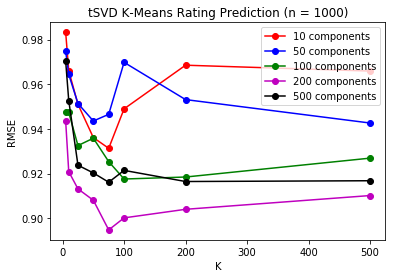

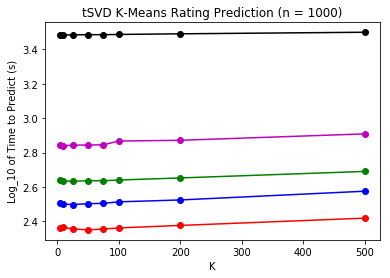

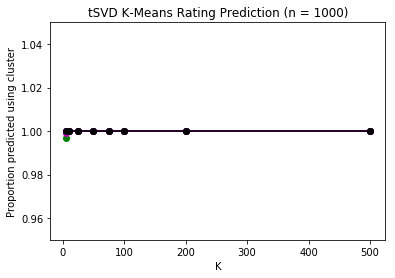

In [281]:
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_10c_rmse, 'ro-', label='10 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_50c_rmse, 'bo-', label='50 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_100c_rmse, 'go-', label='100 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_200c_rmse, 'mo-', label='200 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_500c_rmse, 'ko-', label='500 components')
plt.title('tSVD K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.plot((5,10,25,50,75,100,200,500), tsvdkm_10c_log10ttp, 'ro-', label='10 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_50c_log10ttp, 'bo-', label='50 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_100c_log10ttp, 'go-', label='100 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_200c_log10ttp, 'mo-', label='200 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_500c_log10ttp, 'ko-', label='500 components')
plt.title('tSVD K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('Log_10 of Time to Predict (s)')
plt.show()

plt.plot((5,10,25,50,75,100,200,500), tsvdkm_10c_prop, 'ro-', label='10 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_50c_prop, 'bo-', label='50 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_100c_prop, 'go-', label='100 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_200c_prop, 'mo-', label='200 components')
plt.plot((5,10,25,50,75,100,200,500), tsvdkm_500c_prop, 'ko-', label='500 components')
plt.title('tSVD K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylim(0.95,1.05)
plt.ylabel('Proportion predicted using cluster')
plt.show()


In [231]:
tSVDkClusterExpand((10,50,100), (5,25,100), 3, ['Marked','DBContentRating','DBRuntimeMin'])

(10 components, K = 5) Cluster 0: 3 Most Rated Movies
        ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
706    707  2003.0    The Return       8.9      1384586.0  Adventure   
7289  7290  2000.0  The Specials       8.5      1124325.0     Action   
9175  9176  2001.0      Age of E       8.1       681931.0  Animation   

       DBGenre2 DBGenre3  
706       Drama  Fantasy  
7289  Adventure    Drama  
9175  Adventure   Comedy  
---------------------------------------
(10 components, K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
5925    5926  1999.0    Fight Club       8.8      1553583.0    Drama        0   
11063  11064  1994.0  Pulp Fiction       8.9      1515713.0    Crime    Drama   
8595    8596  1995.0         Seven       8.6      1183672.0    Crime    Drama   

      DBGenre3  
5925         0  
11063        0  
8595   Mystery  
---------------------------------------
(10 components, K = 5)

          ID    Year                       Name  DBRating  DBRatingCount  \
15918  15919  2004.0                    Hellboy       6.9       270202.0   
9441    9442  2004.0  The Chronicles of Riddick       6.7       197197.0   
15408  15409  2004.0                   Eurotrip       6.6       175307.0   

      DBGenre1   DBGenre2 DBGenre3  
15918   Action    Fantasy   Horror  
9441    Action  Adventure   Sci-Fi  
15408   Comedy          0        0  
---------------------------------------
(10 components, K = 25) Cluster 24: 3 Most Rated Movies
          ID    Year                      Name  DBRating  DBRatingCount  \
11282  11283  1994.0              Forrest Gump       8.8      1469706.0   
2861    2862  1991.0  The Silence of the Lambs       8.6      1036650.0   
17156  17157  1998.0       Saving Private Ryan       8.6      1022482.0   

      DBGenre1 DBGenre2  DBGenre3  
11282    Drama  Romance         0  
2861     Crime    Drama  Thriller  
17156    Drama      War         0  
------

5476     Crime        0  
---------------------------------------
(10 components, K = 100) Cluster 33: 3 Most Rated Movies
          ID    Year                 Name  DBRating  DBRatingCount   DBGenre1  \
11811  11812  2004.0  Million Dollar Baby       8.1       551438.0      Drama   
2912    2913  2004.0    Finding Neverland       7.7       185319.0  Biography   
885      886  2004.0                  Ray       7.7       121396.0  Biography   

      DBGenre2 DBGenre3  
11811    Sport        0  
2912     Drama   Family  
885      Drama    Music  
---------------------------------------
(10 components, K = 100) Cluster 34: 3 Most Rated Movies
          ID    Year              Name  DBRating  DBRatingCount DBGenre1  \
16338  16339  1990.0  Kindergarten Cop       6.1       118527.0   Comedy   
4882    4883  1992.0     The Bodyguard       6.2       101348.0   Action   
13101  13102  2000.0       Coyote Ugly       5.6        97189.0   Comedy   

      DBGenre2 DBGenre3  
16338        0      

11676   Action    Crime  Thriller  
---------------------------------------
(10 components, K = 100) Cluster 57: 3 Most Rated Movies
          ID    Year                   Name  DBRating  DBRatingCount DBGenre1  \
12880  12881  2001.0           Moulin Rouge       7.6       242566.0    Drama   
298      299  2001.0  Bridget Jones's Diary       6.7       194636.0   Comedy   
16451  16452  2000.0               Chocolat       7.3       162025.0    Drama   

      DBGenre2 DBGenre3  
12880  Musical  Romance  
298      Drama  Romance  
16451  Romance        0  
---------------------------------------
(10 components, K = 100) Cluster 58: 3 Most Rated Movies
          ID    Year                          Name  DBRating  DBRatingCount  \
14861  14862  1984.0   Once Upon a Time in America       8.4       256505.0   
7069    7070  1968.0  Once Upon a Time in the West       8.5       251880.0   
1707    1708  1936.0                  Modern Times       8.5       173005.0   

      DBGenre1 DBGenre2 

6013     Mystery  Thriller  
---------------------------------------
(10 components, K = 100) Cluster 82: 3 Most Rated Movies
          ID    Year                       Name  DBRating  DBRatingCount  \
4401    4402  1984.0  A Nightmare on Elm Street       7.5       171323.0   
14483  14484  1988.0              The Naked Gun       7.6       128511.0   
2469    2470  1992.0              Wayne's World       7.0       125488.0   

      DBGenre1 DBGenre2 DBGenre3  
4401    Horror        0        0  
14483   Comedy    Crime        0  
2469    Comedy    Music        0  
---------------------------------------
(10 components, K = 100) Cluster 83: 3 Most Rated Movies
          ID    Year               Name  DBRating  DBRatingCount DBGenre1  \
10729  10730  2002.0  Gangs of New York       7.5       351495.0    Crime   
6719    6720  2001.0    Black Hawk Down       7.7       322469.0    Drama   
4042    4043  2002.0              Signs       6.7       298632.0    Drama   

      DBGenre2 DBGenre3

(50 components, K = 5) Cluster 0: 3 Most Rated Movies
        ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
706    707  2003.0    The Return       8.9      1384586.0  Adventure   
7289  7290  2000.0  The Specials       8.5      1124325.0     Action   
9175  9176  2001.0      Age of E       8.1       681931.0  Animation   

       DBGenre2 DBGenre3  
706       Drama  Fantasy  
7289  Adventure    Drama  
9175  Adventure   Comedy  
---------------------------------------
(50 components, K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
5925    5926  1999.0    Fight Club       8.8      1553583.0    Drama        0   
11063  11064  1994.0  Pulp Fiction       8.9      1515713.0    Crime    Drama   
8595    8596  1995.0         Seven       8.6      1183672.0    Crime    Drama   

      DBGenre3  
5925         0  
11063        0  
8595   Mystery  
---------------------------------------
(50 components, K = 5)

          ID    Year                        Name  DBRating  DBRatingCount  \
14617  14618  1998.0             The Truman Show       8.1       774960.0   
13672  13673  1995.0                   Toy Story       8.3       727607.0   
4955    4956  1989.0  Back to the Future Part II       7.8       392214.0   

        DBGenre1   DBGenre2 DBGenre3  
14617     Comedy      Drama   Sci-Fi  
13672  Animation  Adventure   Comedy  
4955   Adventure     Comedy   Sci-Fi  
---------------------------------------
(50 components, K = 25) Cluster 22: 3 Most Rated Movies
          ID    Year                                   Name  DBRating  \
7988    7989  1991.0  Beauty and the Beast: Special Edition       8.0   
3462    3463  1999.0             10 Things I Hate About You       7.3   
15077  15078  1995.0                                Jumanji       6.9   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  
7988        364034.0  Animation   Family  Fantasy  
3462        252137.0     Comedy    Drama  

---------------------------------------
(50 components, K = 100) Cluster 23: 3 Most Rated Movies
          ID    Year                  Name  DBRating  DBRatingCount DBGenre1  \
11611  11612  1998.0  What Dreams May Come       7.0        91011.0    Drama   
3616    3617  1992.0     Death Becomes Her       6.5        88568.0   Comedy   
147      148  2001.0        Sweet November       6.7        76635.0    Drama   

      DBGenre2 DBGenre3  
11611  Fantasy  Romance  
3616   Fantasy   Horror  
147    Romance        0  
---------------------------------------
(50 components, K = 100) Cluster 24: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
1072    1073  2005.0  Coach Carter       7.3       104021.0  Biography   
405      406  2005.0       Hostage       6.6        99148.0     Action   
10905  10906  2004.0      Cellular       6.5        84293.0     Action   

      DBGenre2  DBGenre3  
1072     Drama     Sport  
405      Crime     Drama  
109

17354    Drama   Romance  
---------------------------------------
(50 components, K = 100) Cluster 48: 3 Most Rated Movies
          ID    Year                         Name  DBRating  DBRatingCount  \
17481  17482  1995.0                     Clueless       6.8       142974.0   
1999    2000  1994.0  Four Weddings and a Funeral       7.1       118950.0   
12171  12172  1998.0                Pleasantville       7.5       110464.0   

      DBGenre1 DBGenre2 DBGenre3  
17481   Comedy  Romance        0  
1999    Comedy    Drama  Romance  
12171   Comedy    Drama  Fantasy  
---------------------------------------
(50 components, K = 100) Cluster 49: 3 Most Rated Movies
          ID    Year                            Name  DBRating  DBRatingCount  \
4828    4829  2004.0               Shaun of the Dead       8.0       441684.0   
3823    3824  1998.0  Fear and Loathing in Las Vegas       7.7       231491.0   
12837  12838  1999.0             The Boondock Saints       7.9       210214.0   

 

(50 components, K = 100) Cluster 74: 3 Most Rated Movies
          ID    Year                                   Name  DBRating  \
7634    7635  2004.0  Anchorman: The Legend of Ron Burgundy       7.2   
757      758  2004.0                             Mean Girls       7.0   
10582  10583  2003.0                     The School of Rock       7.1   

       DBRatingCount DBGenre1 DBGenre2 DBGenre3  
7634        293525.0   Comedy        0        0  
757         280283.0   Comedy        0        0  
10582       230464.0   Comedy    Music        0  
---------------------------------------
(50 components, K = 100) Cluster 75: 3 Most Rated Movies
        ID    Year                      Name  DBRating  DBRatingCount  \
8595  8596  1995.0                     Seven       8.6      1183672.0   
2861  2862  1991.0  The Silence of the Lambs       8.6      1036650.0   
6973  6974  1995.0        The Usual Suspects       8.6       846009.0   

     DBGenre1 DBGenre2  DBGenre3  
8595    Crime    Drama   

        ID    Year                Name  DBRating  DBRatingCount   DBGenre1  \
7192  7193  1987.0  The Princess Bride       8.1       335142.0  Adventure   
7232  7233  1986.0         Stand by Me       8.1       313383.0  Adventure   
6796  6797  1985.0  The Breakfast Club       7.9       294898.0     Comedy   

     DBGenre2 DBGenre3  
7192   Family  Fantasy  
7232    Drama        0  
6796    Drama        0  
---------------------------------------
(50 components, K = 100) Cluster 99: 3 Most Rated Movies
          ID    Year                     Name  DBRating  DBRatingCount  \
5990    5991  2005.0                 Sin City       8.0       698246.0   
467      468  2003.0  The Matrix: Revolutions       6.7       396065.0   
15918  15919  2004.0                  Hellboy       6.9       270202.0   

      DBGenre1  DBGenre2 DBGenre3  
5990     Crime  Thriller        0  
467     Action    Sci-Fi        0  
15918   Action   Fantasy   Horror  
---------------------------------------
(100 comp

        ID    Year                           Name  DBRating  DBRatingCount  \
1255  1256  1994.0    The Best of Friends: Vol. 4       0.0            NaN   
1876  1877  1995.0              Friends: Season 2       0.0            NaN   
2937  2938  1994.0  The Best of Friends: Season 1       0.0            NaN   

     DBGenre1 DBGenre2 DBGenre3  
1255        0        0        0  
1876        0        0        0  
2937        0        0        0  
---------------------------------------
(100 components, K = 25) Cluster 22: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
5925    5926  1999.0    Fight Club       8.8      1553583.0    Drama        0   
11063  11064  1994.0  Pulp Fiction       8.9      1515713.0    Crime    Drama   
11282  11283  1994.0  Forrest Gump       8.8      1469706.0    Drama  Romance   

      DBGenre3  
5925         0  
11063        0  
11282        0  
---------------------------------------
(100 components, K = 

          ID    Year                       Name  DBRating  DBRatingCount  \
11088  11089  2001.0                   Monsters       8.1       681931.0   
3937    3938  2004.0                    Shrek 2       7.2       353756.0   
3961    3962  2003.0  Finding Nemo (Widescreen)       0.0            NaN   

        DBGenre1   DBGenre2 DBGenre3  
11088  Animation  Adventure   Comedy  
3937   Animation  Adventure   Comedy  
3961           0          0        0  
---------------------------------------
(100 components, K = 100) Cluster 26: 3 Most Rated Movies
          ID    Year                       Name  DBRating  DBRatingCount  \
10758  10759  2004.0  Alexander: Director's Cut       5.6       148871.0   
3014    3015  2004.0              The Final Cut       5.6       148868.0   
8332    8333  2004.0                 The Grudge       5.9       126029.0   

      DBGenre1   DBGenre2   DBGenre3  
10758   Action  Adventure  Biography  
3014    Action  Adventure  Biography  
8332    Horror    M

---------------------------------------
(100 components, K = 100) Cluster 53: 3 Most Rated Movies
          ID    Year                  Name  DBRating  DBRatingCount DBGenre1  \
142      143  1997.0              The Game       7.8       294929.0    Drama   
5429    5430  1996.0              Sleepers       7.6       167343.0    Crime   
14826  14827  1999.0  For Love of the Game       6.8       160976.0    Drama   

      DBGenre2  DBGenre3  
142    Mystery  Thriller  
5429     Drama  Thriller  
14826  Romance         0  
---------------------------------------
(100 components, K = 100) Cluster 54: 3 Most Rated Movies
          ID    Year      Name  DBRating  DBRatingCount   DBGenre1 DBGenre2  \
8203    8204  1981.0  Das Boot       8.4       194533.0  Adventure    Drama   
11241  11242  1985.0    Brazil       8.0       167135.0      Drama   Sci-Fi   
310      311  1994.0   Ed Wood       7.9       152158.0  Biography   Comedy   

       DBGenre3  
8203   Thriller  
11241         0  
310 

          ID    Year              Name  DBRating  DBRatingCount     DBGenre1  \
13080  13081  2004.0              Troy       7.2       426733.0        Drama   
3623    3624  2003.0  The Last Samurai       5.7            9.0  Documentary   

      DBGenre2 DBGenre3  
13080  History  Romance  
3623     Short        0  
---------------------------------------
(100 components, K = 100) Cluster 81: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
7532    7533  1999.0  East Is East       7.0       339144.0     Comedy   
14670  14671  2004.0      Downfall       8.2       285893.0  Biography   
12718  12719  2001.0        Elling       6.3       107397.0     Comedy   

      DBGenre2 DBGenre3  
7532         0        0  
14670    Drama  History  
12718   Family  Romance  
---------------------------------------
(100 components, K = 100) Cluster 82: 3 Most Rated Movies
          ID    Year         Name  DBRating  DBRatingCount   DBGenre1  \
8727    872

9432     Drama   Family  Musical  
---------------------------------------


# NMF + K-Means on lower-dimensional space

In [233]:
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans


In [237]:
def NMFkClusterExpand(componentsArray, karray, topN, dropcols, reducFactor):
    global movie_titles
    mt = movie_titles.copy()
    
    mt = mt.sort_values(['DBRatingCount'], ascending=False)   
    mt = mt.drop(dropcols, axis=1)
    
    for n_components in componentsArray:
        nmf = NMF(n_components = n_components)
        
        n_viewers = int(2649430 / (reducFactor * n_components))
        random_sample_viewers = np.random.choice(2649430, size = n_viewers)
        ratings_small = ratings_csr[:,random_sample_viewers]
        
        Z = nmf.fit_transform(ratings_small)
        
        for k in karray:
            km = KMeans(n_clusters=k).fit(Z)

            cluster_map = pd.DataFrame()
            cluster_map['ID'] = movie_titles.index.values + 1
            cluster_map['cluster'] = km.labels_[1:]

            for i in range(0,k):
                print("(" + str(n_components) + " components, K = " + str(k) + ") Cluster " + str(i) + ": " + str(topN) + " Most Rated Movies")
                c = cluster_map[cluster_map['cluster'] == i]['ID']

                #census_df.iloc[census_df['COUNTY'].argsort()[-3:]]


                print(mt[mt['ID'].isin(c)].head(3))
                print("---------------------------------------")

In [31]:
def nmfkm(componentsArray, kArray, testSize, reducFactor):
    for n_components in componentsArray:
            
        nmf = NMF(n_components = n_components)
        working, testers = randTestSetGen(testSize)
        
        n_viewers = int(2649430 / (reducFactor * n_components))
        random_sample_viewers = np.random.choice(2649430, size = n_viewers)
        ratings_small = working[:,random_sample_viewers]
        
        users_hmratings = working.getnnz(axis=0)
        movies_hmusers = working.getnnz(axis=1)
        allMeanRating = working.sum() / working.count_nonzero()
        
        nmf_start_time = time.time()
        
        Z = nmf.fit_transform(ratings_small)
        
        nmf_time = time.time() - nmf_start_time
        print("NMF time: " + str(nmf_time))
        print()
        
        for k in kArray:
            print("For test size " + str(testSize) + " with " + str(n_components) + " components and k = " + str(k) + ":")
            start_time = time.time()
            
            km = KMeans(n_clusters=k).fit(Z)
            
            clabels = pd.DataFrame(km.labels_)
            countInKM = 0
        
            for tester in testers:
                clusnum = int(clabels.loc[tester[0]])
                checkArray = clabels[clabels[0] == clusnum].index.values
                
                userHasRated = working[:,tester[1]].nonzero()[0]
                
                moviesRatedInSameCluster = set(userHasRated) & set(checkArray)
                
                if len(moviesRatedInSameCluster) > 0:
                    avgRating = 0

                    for movieID in moviesRatedInSameCluster:
                        avgRating += working[movieID, tester[1]]

                    avgRating = avgRating / len(moviesRatedInSameCluster)

                    working[tester[0],tester[1]] = avgRating
                    
                    countInKM += 1

                elif users_hmratings[tester[1]] > 0:
                    working[tester[0],tester[1]] = working.getcol(tester[1]).sum() / users_hmratings[tester[1]]
                elif movies_hmusers[tester[0]]  > 0: # impute mean rating given for a movie
                    working[tester[0],tester[1]] = working.getrow(tester[0]).sum() / movies_hmusers[tester[0]]
                else: # impute mean rating given by all users
                    working[tester[0],tester[1]] = allMeanRating
            
            errorCalc(testers, working)
            print('Time to fit and predict (including NMF) (' + str(testSize) + '): ' + str(time.time() - start_time + nmf_time))
            print('Proportion predicted using KM:  ' + str(countInKM/testSize))
            print()

In [30]:
nmfkm([10],[5,10,25,50,75,100,200,500],1000,1.5)

For test size 1000 with 10 components and k = 5:
Average absolute residual: 0.736005
Root mean square residual: 0.9175335765692324
Time to fit and predict (including NMF) (1000): 256.6069133281708
Proportion predicted using KM:  0.996

For test size 1000 with 10 components and k = 10:
Average absolute residual: 0.723212
Root mean square residual: 0.9132570810113962
Time to fit and predict (including NMF) (1000): 253.97164583206177
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 25:
Average absolute residual: 0.715044
Root mean square residual: 0.914927472747364
Time to fit and predict (including NMF) (1000): 250.4866213798523
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 50:
Average absolute residual: 0.720117
Root mean square residual: 0.9239694757373867
Time to fit and predict (including NMF) (1000): 250.46322560310364
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 75:
Average 

In [34]:
nmfkm([10],[5,10,25,50,75,100,200,500],1000,.75)

NMF time: 248.23230123519897

For test size 1000 with 10 components and k = 5:
Average absolute residual: 0.778158
Root mean square residual: 1.0020583545535064
Time to fit and predict (including NMF) (1000): 409.51748037338257
Proportion predicted using KM:  0.999

For test size 1000 with 10 components and k = 10:
Average absolute residual: 0.759732
Root mean square residual: 0.9819943842193167
Time to fit and predict (including NMF) (1000): 404.9424204826355
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 25:
Average absolute residual: 0.742871
Root mean square residual: 0.9757369862909616
Time to fit and predict (including NMF) (1000): 402.15843057632446
Proportion predicted using KM:  1.0

For test size 1000 with 10 components and k = 50:
Average absolute residual: 0.740654
Root mean square residual: 0.9752973983265285
Time to fit and predict (including NMF) (1000): 402.2139172554016
Proportion predicted using KM:  1.0

For test size 1000 with 10 

In [33]:
nmfkm([50],[5,10,25,50,75,100,200,500],1000,1)

NMF time: 134.01671290397644

For test size 1000 with 50 components and k = 5:
Average absolute residual: 0.781004
Root mean square residual: 0.9930704648485169
Time to fit and predict (including NMF) (1000): 301.14650201797485
Proportion predicted using KM:  0.999

For test size 1000 with 50 components and k = 10:
Average absolute residual: 0.74897
Root mean square residual: 0.9622383306939932
Time to fit and predict (including NMF) (1000): 291.0844874382019
Proportion predicted using KM:  1.0

For test size 1000 with 50 components and k = 25:
Average absolute residual: 0.742327
Root mean square residual: 0.9575938536858637
Time to fit and predict (including NMF) (1000): 285.2840769290924
Proportion predicted using KM:  1.0

For test size 1000 with 50 components and k = 50:
Average absolute residual: 0.734433
Root mean square residual: 0.9579063618456778
Time to fit and predict (including NMF) (1000): 286.44017457962036
Proportion predicted using KM:  1.0

For test size 1000 with 50 c

In [42]:
nmfkm([50],[5,10,25,50,75,100,200,500],1000,.5)

NMF time: 276.42015862464905

For test size 1000 with 50 components and k = 5:
Average absolute residual: 0.731767
Root mean square residual: 0.9320133511278704
Time to fit and predict (including NMF) (1000): 441.26560044288635
Proportion predicted using KM:  1.0

For test size 1000 with 50 components and k = 10:
Average absolute residual: 0.715351
Root mean square residual: 0.9145600358664824
Time to fit and predict (including NMF) (1000): 433.2693519592285
Proportion predicted using KM:  1.0

For test size 1000 with 50 components and k = 25:
Average absolute residual: 0.702319
Root mean square residual: 0.9043804813896421
Time to fit and predict (including NMF) (1000): 428.29193687438965
Proportion predicted using KM:  1.0

For test size 1000 with 50 components and k = 50:
Average absolute residual: 0.690687
Root mean square residual: 0.8952688649247736
Time to fit and predict (including NMF) (1000): 426.4423613548279
Proportion predicted using KM:  1.0

For test size 1000 with 50 co

In [43]:
nmfkm([100],[5,10,25,50,75,100,200,500],1000,1)

NMF time: 213.06120252609253

For test size 1000 with 100 components and k = 5:
Average absolute residual: 0.793861
Root mean square residual: 0.999758214330636
Time to fit and predict (including NMF) (1000): 393.8284833431244
Proportion predicted using KM:  1.0

For test size 1000 with 100 components and k = 10:
Average absolute residual: 0.787166
Root mean square residual: 0.9986070527772553
Time to fit and predict (including NMF) (1000): 397.44527983665466
Proportion predicted using KM:  1.0

For test size 1000 with 100 components and k = 25:
Average absolute residual: 0.763435
Root mean square residual: 0.9676718095526022
Time to fit and predict (including NMF) (1000): 384.7038342952728
Proportion predicted using KM:  1.0

For test size 1000 with 100 components and k = 50:
Average absolute residual: 0.743688
Root mean square residual: 0.9563718431425912
Time to fit and predict (including NMF) (1000): 390.46423602104187
Proportion predicted using KM:  1.0

For test size 1000 with 10

In [35]:
nmfkm([100],[5,10,25,50,75,100,200,500],1000,.5)

NMF time: 360.47410249710083

For test size 1000 with 100 components and k = 5:
Average absolute residual: 0.787901
Root mean square residual: 0.9926134531819243
Time to fit and predict (including NMF) (1000): 533.6947665214539
Proportion predicted using KM:  0.999

For test size 1000 with 100 components and k = 10:
Average absolute residual: 0.78794
Root mean square residual: 0.9946116472637351
Time to fit and predict (including NMF) (1000): 531.1209626197815
Proportion predicted using KM:  1.0

For test size 1000 with 100 components and k = 25:
Average absolute residual: 0.78044
Root mean square residual: 0.9931466280176807
Time to fit and predict (including NMF) (1000): 527.5756385326385
Proportion predicted using KM:  1.0

For test size 1000 with 100 components and k = 50:
Average absolute residual: 0.764415
Root mean square residual: 0.9714601508334967
Time to fit and predict (including NMF) (1000): 522.7000617980957
Proportion predicted using KM:  1.0

For test size 1000 with 100

In [40]:
nmfkm([200],[5,10,25,50,75,100,200,500],1000,1.5)

NMF time: 372.80583477020264

For test size 1000 with 200 components and k = 5:
Average absolute residual: 0.790631
Root mean square residual: 0.9926644027665785
Time to fit and predict (including NMF) (1000): 535.7265961170197
Proportion predicted using KM:  0.997

For test size 1000 with 200 components and k = 10:
Average absolute residual: 0.774747
Root mean square residual: 0.9817241822887346
Time to fit and predict (including NMF) (1000): 530.0111050605774
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 25:
Average absolute residual: 0.767216
Root mean square residual: 0.972591597158636
Time to fit and predict (including NMF) (1000): 527.7133061885834
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 50:
Average absolute residual: 0.754931
Root mean square residual: 0.9628484689642013
Time to fit and predict (including NMF) (1000): 532.1524903774261
Proportion predicted using KM:  1.0

For test size 1000 with 20

In [36]:
nmfkm([200],[5,10,25,50,75,100,200,500],1000,.75)

NMF time: 532.9062905311584

For test size 1000 with 200 components and k = 5:
Average absolute residual: 0.79386
Root mean square residual: 0.9871522085771334
Time to fit and predict (including NMF) (1000): 711.7632455825806
Proportion predicted using KM:  0.995

For test size 1000 with 200 components and k = 10:
Average absolute residual: 0.77409
Root mean square residual: 0.9680180707162996
Time to fit and predict (including NMF) (1000): 697.4160504341125
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 25:
Average absolute residual: 0.767462
Root mean square residual: 0.968275692406575
Time to fit and predict (including NMF) (1000): 695.8773498535156
Proportion predicted using KM:  1.0

For test size 1000 with 200 components and k = 50:
Average absolute residual: 0.756184
Root mean square residual: 0.9549021802605081
Time to fit and predict (including NMF) (1000): 697.4772508144379
Proportion predicted using KM:  1.0

For test size 1000 with 200 c

In [39]:
nmfkm([500],[5,10,25,50,75,100,200,500],1000,1)

NMF time: 1627.7834827899933

For test size 1000 with 500 components and k = 5:
Average absolute residual: 0.799348
Root mean square residual: 1.0026704774536432
Time to fit and predict (including NMF) (1000): 1794.4288153648376
Proportion predicted using KM:  0.996

For test size 1000 with 500 components and k = 10:
Average absolute residual: 0.78781
Root mean square residual: 0.9948509691281134
Time to fit and predict (including NMF) (1000): 1790.031723499298
Proportion predicted using KM:  1.0

For test size 1000 with 500 components and k = 25:
Average absolute residual: 0.789863
Root mean square residual: 1.0053873973263727
Time to fit and predict (including NMF) (1000): 1791.3249907493591
Proportion predicted using KM:  1.0

For test size 1000 with 500 components and k = 50:
Average absolute residual: 0.795727
Root mean square residual: 1.0180116048649792
Time to fit and predict (including NMF) (1000): 1797.571524143219
Proportion predicted using KM:  1.0

For test size 1000 with 

In [37]:
nmfkm([500],[5,10,25,50,75,100,200,500],1000,.5)

NMF time: 2096.890147447586

For test size 1000 with 500 components and k = 5:
Average absolute residual: 0.805496
Root mean square residual: 1.009437906295055
Time to fit and predict (including NMF) (1000): 2262.8577234745026
Proportion predicted using KM:  1.0

For test size 1000 with 500 components and k = 10:
Average absolute residual: 0.803373
Root mean square residual: 1.009657007274682
Time to fit and predict (including NMF) (1000): 2256.977356672287
Proportion predicted using KM:  1.0

For test size 1000 with 500 components and k = 25:
Average absolute residual: 0.793146
Root mean square residual: 1.0042881220788895
Time to fit and predict (including NMF) (1000): 2254.848243713379
Proportion predicted using KM:  1.0

For test size 1000 with 500 components and k = 50:
Average absolute residual: 0.796615
Root mean square residual: 1.013682988276779
Time to fit and predict (including NMF) (1000): 2263.395399570465
Proportion predicted using KM:  1.0

For test size 1000 with 500 co

In [44]:
nmfkm_10c_15_rmse = (0.9175335765692324, 0.9132570810113962, 0.914927472747364, 0.9239694757373867, 0.9237663458073534, 0.9285158419739209, 0.946208938655105, 0.9710443461120037)

nmfkm_10c_15_ttp = (256.6069133281708, 253.97164583206177, 250.4866213798523, 250.46322560310364, 254.4954285621643, 257.7109110355377, 267.44951272010803, 311.02958393096924)

nmfkm_10c_15_prop = (.996, 1, 1, 1, 1, 1, 1, 1)

nmfkm_10c_75_rmse = (1.0020583545535064, 0.9819943842193167, 0.9757369862909616, 0.9752973983265285, 0.9681707619378892, 0.9888698348044384, 1.0171091825978915, 1.015881902041105)

nmfkm_10c_75_ttp = (409.51748037338257, 404.9424204826355, 402.15843057632446, 402.2139172554016, 405.6060879230499, 408.47397327423096, 418.231055021286, 474.96063780784607)

nmfkm_10c_75_prop = (.999, 1, 1, 1, 1, 1, 1, 1)

nmfkm_50c_1_rmse = (0.9930704648485169, 0.9622383306939932, 0.9575938536858637, 0.9579063618456778, 0.9654294911700216, 0.9712930955003429, 0.9794116457745511, 0.9960604793003647)

nmfkm_50c_1_ttp = (301.14650201797485, 291.0844874382019, 285.2840769290924, 286.44017457962036, 289.9053988456726, 294.970885515213, 301.5398859977722, 349.4221456050873)

nmfkm_50c_1_prop = (.999, 1, 1, 1, 1, 1, 1, 1)

nmfkm_50c_5_rmse = (0.9320133511278704, 0.9145600358664824, 0.9043804813896421, 0.8952688649247736, 0.8910857564777318, 0.8862719985857289, 0.9111230651399498, 0.9270179954107188)

nmfkm_50c_5_ttp = (441.26560044288635, 433.2693519592285, 428.29193687438965, 426.4423613548279, 430.3419117927551, 434.8451066017151, 441.8435842990875, 484.7518541812897)

nmfkm_50c_5_prop = (1, 1, 1, 1, 1, 1, 1, 1)

nmfkm_100c_1_rmse = (0.999758214330636, 0.9986070527772553, 0.9676718095526022, 0.9563718431425912, 0.9464551466940598, 0.9634795950751579, 0.9701413653290608, 0.9890494094151079)

nmfkm_100c_1_ttp = (393.8284833431244, 397.44527983665466, 384.7038342952728, 390.46423602104187, 399.0733344554901, 407.65136098861694, 406.1612401008606, 446.4644103050232)

nmfkm_100c_1_prop = (1, 1, 1, 1, 1, 1, 1, 1)

nmfkm_100c_5_rmse = (0.9926134531819243, 0.9946116472637351, 0.9931466280176807, 0.9714601508334967, 0.9698934574703768, 0.9642809566249241, 0.9664202640538092, 0.9764259242875929)

nmfkm_100c_5_ttp = (533.6947665214539, 531.1209626197815, 527.5756385326385, 522.7000617980957, 529.4736309051514, 526.1892831325531, 543.7155575752258, 597.2205517292023)

nmfkm_100c_5_prop = (.999, 1, 1, 1, 1, 1, 1, 1)

nmfkm_200c_15_rmse = (0.9926644027665785, 0.9817241822887346, 0.972591597158636, 0.9628484689642013, 0.9534035885261779, 0.9491011935307654, 0.9840357362336678, 0.9804354354244285)

nmfkm_200c_15_ttp = (535.7265961170197, 530.0111050605774, 527.7133061885834, 532.1524903774261, 536.2053663730621, 544.6749053001404, 556.7995116710663, 611.2580437660217)

nmfkm_200c_15_prop = (.997, 1, 1, 1, 1, 1, 1, 1)

nmfkm_200c_75_rmse = (0.9871522085771334, 0.9680180707162996, 0.968275692406575, 0.9549021802605081, 0.9541728404038331, 0.952007388891669, 0.9621613005651424, 0.9455927598881815)

nmfkm_200c_75_ttp = (711.7632455825806, 697.4160504341125, 695.8773498535156, 697.4772508144379, 702.1649570465088, 708.052366733551, 729.0587658882141, 781.0822017192841)

nmfkm_200c_75_prop = (.995, 1, 1, 1, 1, 1, 1, 1)

nmfkm_500c_1_rmse = (1.0026704774536432, 0.9948509691281134, 1.0053873973263727, 1.0180116048649792, 1.0439609565668917, 1.0167469576622923, 1.0283690583212866, 1.0305428247673671)

nmfkm_500c_1_ttp = (1794.4288153648376, 1790.031723499298, 1791.3249907493591, 1797.571524143219, 1802.5244255065918, 1810.9292521476746, 1838.450441122055, 1944.6871423721313)

nmfkm_500c_1_prop = (.996, 1, 1, 1, 1, 1, 1, 1)

nmfkm_500c_5_rmse = (1.009437906295055, 1.009657007274682, 1.0042881220788895, 1.013682988276779, 1.0220528474084953, 1.0357558331354082, 1.0435142662049204, 1.0459570204910906)

nmfkm_500c_5_ttp = (2262.8577234745026, 2256.977356672287, 2254.848243713379, 2263.395399570465, 2274.0640785694122, 2276.449687719345, 2320.804938316345, 2406.299691915512)

nmfkm_500c_5_prop = (1, 1, 1, 1, 1, 1, 1, 1)

In [65]:
nmfkm_10c_15_log10ttp = np.log10(nmfkm_10c_15_ttp)
nmfkm_10c_75_log10ttp = np.log10(nmfkm_10c_75_ttp)
nmfkm_50c_1_log10ttp = np.log10(nmfkm_50c_1_ttp)
nmfkm_50c_5_log10ttp = np.log10(nmfkm_50c_5_ttp)
nmfkm_100c_1_log10ttp = np.log10(nmfkm_100c_1_ttp)
nmfkm_100c_5_log10ttp = np.log10(nmfkm_100c_5_ttp)
nmfkm_200c_15_log10ttp = np.log10(nmfkm_200c_15_ttp)
nmfkm_200c_75_log10ttp = np.log10(nmfkm_200c_75_ttp)
nmfkm_500c_1_log10ttp = np.log10(nmfkm_500c_1_ttp)
nmfkm_500c_5_log10ttp = np.log10(nmfkm_500c_5_ttp)

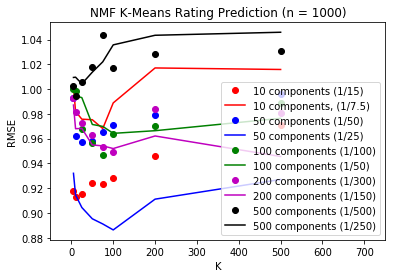

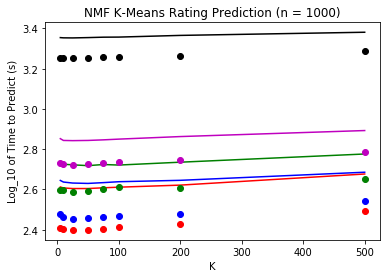

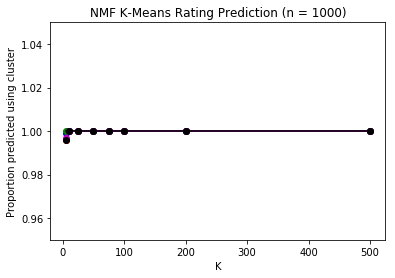

In [283]:
#plt.figure(figsize=(12,6))
plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_15_rmse, 'ro', label='10 components (1/15)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_75_rmse, 'r-', label='10 components, (1/7.5)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_1_rmse, 'bo', label='50 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_5_rmse, 'b-', label='50 components (1/25)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_1_rmse, 'go', label='100 components (1/100)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_5_rmse, 'g-', label='100 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_15_rmse, 'mo', label='200 components (1/300)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_75_rmse, 'm-', label='200 components (1/150)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_1_rmse, 'ko', label='500 components (1/500)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_5_rmse, 'k-', label='500 components (1/250)')
plt.title('NMF K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.xlim(-50,750)
plt.legend()
plt.show()

plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_15_log10ttp, 'ro', label='10 components (1/15)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_75_log10ttp, 'r-', label='10 components, (1/7.5)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_1_log10ttp, 'bo', label='50 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_5_log10ttp, 'b-', label='50 components (1/25)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_1_log10ttp, 'go', label='100 components (1/100)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_5_log10ttp, 'g-', label='100 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_15_log10ttp, 'mo', label='200 components (1/300)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_75_log10ttp, 'm-', label='200 components (1/150)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_1_log10ttp, 'ko', label='500 components (1/500)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_5_log10ttp, 'k-', label='500 components (1/250)')
plt.title('NMF K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylabel('Log_10 of Time to Predict (s)')
plt.show()

plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_15_prop, 'ro', label='10 components (1/15)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_10c_75_prop, 'r-', label='10 components, (1/7.5)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_1_prop, 'bo', label='50 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_50c_5_prop, 'b-', label='50 components (1/25)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_1_prop, 'go', label='100 components (1/100)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_100c_5_prop, 'g-', label='100 components (1/50)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_15_prop, 'mo', label='200 components (1/300)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_200c_75_prop, 'm-', label='200 components (1/150)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_1_prop, 'ko', label='500 components (1/500)')
plt.plot((5,10,25,50,75,100,200,500), nmfkm_500c_5_prop, 'k-', label='500 components (1/250)')
plt.title('NMF K-Means Rating Prediction (n = 1000)')
plt.xlabel('K')
plt.ylim(0.95,1.05)
plt.ylabel('Proportion predicted using cluster')
plt.show()


In [238]:
NMFkClusterExpand((10,50,100), (5,25,100), 3, ['Marked','DBContentRating','DBRuntimeMin'], 1)

(10 components, K = 5) Cluster 0: 3 Most Rated Movies
        ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
706    707  2003.0    The Return       8.9      1384586.0  Adventure   
7289  7290  2000.0  The Specials       8.5      1124325.0     Action   
9175  9176  2001.0      Age of E       8.1       681931.0  Animation   

       DBGenre2 DBGenre3  
706       Drama  Fantasy  
7289  Adventure    Drama  
9175  Adventure   Comedy  
---------------------------------------
(10 components, K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
5925    5926  1999.0    Fight Club       8.8      1553583.0    Drama        0   
11063  11064  1994.0  Pulp Fiction       8.9      1515713.0    Crime    Drama   
8595    8596  1995.0         Seven       8.6      1183672.0    Crime    Drama   

      DBGenre3  
5925         0  
11063        0  
8595   Mystery  
---------------------------------------
(10 components, K = 5)

          ID    Year                          Name  DBRating  DBRatingCount  \
6286    6287  1990.0                  Pretty Woman       7.0       241736.0   
14537  14538  2003.0  How to Lose a Guy in 10 Days       6.4       178268.0   
2151    2152  2000.0               What Women Want       6.4       173046.0   

      DBGenre1 DBGenre2 DBGenre3  
6286    Comedy  Romance        0  
14537   Comedy  Romance        0  
2151    Comedy  Fantasy  Romance  
---------------------------------------
(10 components, K = 100) Cluster 0: 3 Most Rated Movies
          ID    Year                                    Name  DBRating  \
13706  13707  1983.0                                Scarface       8.3   
9173    9174  1961.0  Rocky & Bullwinkle & Friends: Season 1       8.1   
4647    4648  1960.0  Rocky & Bullwinkle & Friends: Season 2       8.1   

       DBRatingCount DBGenre1 DBGenre2 DBGenre3  
13706       617209.0    Crime    Drama        0  
9173        438592.0    Drama    Sport        0  


          ID    Year              Name  DBRating  DBRatingCount   DBGenre1  \
13922  13923  2000.0         Cast Away       7.8       444639.0  Adventure   
7232    7233  1986.0       Stand by Me       8.1       313383.0  Adventure   
5774    5775  1992.0  Scent of a Woman       8.0       217442.0      Drama   

      DBGenre2 DBGenre3  
13922    Drama  Romance  
7232     Drama        0  
5774         0        0  
---------------------------------------
(10 components, K = 100) Cluster 23: 3 Most Rated Movies
          ID    Year                  Name  DBRating  DBRatingCount DBGenre1  \
10423  10424  1993.0         Carlito's Way       7.9       177325.0    Crime   
14826  14827  1999.0  For Love of the Game       6.8       160976.0    Drama   
9613    9614  1979.0              Rocky II       7.2       158259.0    Drama   

      DBGenre2  DBGenre3  
10423    Drama  Thriller  
14826  Romance         0  
9613     Sport         0  
---------------------------------------
(10 components, K

11903     Action  Adventure   Western  
---------------------------------------
(10 components, K = 100) Cluster 48: 3 Most Rated Movies
          ID    Year                  Name  DBRating  DBRatingCount DBGenre1  \
757      758  2004.0            Mean Girls       7.0       280283.0   Comedy   
16081  16082  2004.0        13 Going on 30       6.1       137522.0   Comedy   
6858    6859  2003.0  Cheaper by the Dozen       5.8        82674.0   Comedy   

      DBGenre2 DBGenre3  
757          0        0  
16081  Fantasy  Romance  
6858    Family        0  
---------------------------------------
(10 components, K = 100) Cluster 49: 3 Most Rated Movies
          ID    Year          Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
8805    8806  1966.0      The Good       8.9       575625.0  Western        0   
9527    9528  1957.0  12 Angry Men       8.9       538220.0    Crime    Drama   
10831  10832  1960.0        Psycho       8.5       492144.0   Horror  Mystery   

       DBGenre3 

12354  Adventure    Drama   Sci-Fi  
---------------------------------------
(10 components, K = 100) Cluster 77: 3 Most Rated Movies
          ID    Year                        Name  DBRating  DBRatingCount  \
4828    4829  2004.0           Shaun of the Dead       8.0       441684.0   
12837  12838  1999.0         The Boondock Saints       7.9       210214.0   
14889  14890  2004.0  Team America: World Police       7.2       145548.0   

      DBGenre1 DBGenre2  DBGenre3  
4828    Comedy   Horror         0  
12837   Action    Crime  Thriller  
14889   Action   Comedy         0  
---------------------------------------
(10 components, K = 100) Cluster 78: 3 Most Rated Movies
          ID    Year         Name  DBRating  DBRatingCount DBGenre1 DBGenre2  \
3904    3905  2001.0   The Others       7.6       298657.0   Horror  Mystery   
6554    6555  2002.0     Insomnia       7.2       241840.0    Drama  Mystery   
17621  17622  2001.0  Vanilla Sky       6.9       223621.0  Fantasy  Mystery

(50 components, K = 5) Cluster 0: 3 Most Rated Movies
        ID    Year        Name  DBRating  DBRatingCount DBGenre1  DBGenre2  \
5925  5926  1999.0  Fight Club       8.8      1553583.0    Drama         0   
8595  8596  1995.0       Seven       8.6      1183672.0    Crime     Drama   
5861  5862  2000.0     Memento       8.5       966259.0  Mystery  Thriller   

     DBGenre3  
5925        0  
8595  Mystery  
5861        0  
---------------------------------------
(50 components, K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year                                           Name  DBRating  \
2451    2452  2001.0  Lord of the Rings: The Fellowship of the Ring       8.8   
14239  14240  2003.0      Lord of the Rings: The Return of the King       8.9   
11520  11521  2002.0              Lord of the Rings: The Two Towers       8.7   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  
2451       1403566.0  Adventure    Drama  Fantasy  
14239      1384647.0  Adventure    Drama  Fant

          ID    Year                                   Name  DBRating  \
1864    1865  2004.0  Eternal Sunshine of the Spotless Mind       8.3   
13846  13847  2001.0           Donnie Darko: Director's Cut       8.1   
16968  16969  2001.0                           Donnie Darko       8.1   

       DBRatingCount DBGenre1 DBGenre2  DBGenre3  
1864        766948.0    Drama  Romance    Sci-Fi  
13846       660003.0    Drama   Sci-Fi  Thriller  
16968       660003.0    Drama   Sci-Fi  Thriller  
---------------------------------------
(50 components, K = 25) Cluster 24: 3 Most Rated Movies
          ID    Year             Name  DBRating  DBRatingCount DBGenre1  \
5236    5237  1995.0       To Die For       8.6       845993.0    Crime   
14617  14618  1998.0  The Truman Show       8.1       774960.0   Comedy   
5990    5991  2005.0         Sin City       8.0       698246.0    Crime   

       DBGenre2  DBGenre3  
5236    Mystery  Thriller  
14617     Drama    Sci-Fi  
5990   Thriller       

---------------------------------------
(50 components, K = 100) Cluster 22: 3 Most Rated Movies
          ID    Year             Name  DBRating  DBRatingCount   DBGenre1  \
10946  10947  2004.0  The Incredibles       6.3          138.0  Biography   

      DBGenre2 DBGenre3  
10946    Drama  History  
---------------------------------------
(50 components, K = 100) Cluster 23: 3 Most Rated Movies
          ID    Year                             Name  DBRating  \
8326    8327  1975.0  One Flew Over the Cuckoo's Nest       8.7   
10773  10774  1976.0                      Taxi Driver       8.3   
4726    4727  1979.0             Apocalypse Now Redux       8.5   

       DBRatingCount DBGenre1 DBGenre2 DBGenre3  
8326        773841.0    Drama        0        0  
10773       588729.0    Crime    Drama        0  
4726        511378.0    Drama      War        0  
---------------------------------------
(50 components, K = 100) Cluster 24: 3 Most Rated Movies
          ID    Year          Nam

          ID    Year              Name  DBRating  DBRatingCount DBGenre1  \
14690  14691  1999.0        The Matrix       8.7      1393609.0   Action   
12784  12785  2000.0             X-Men       7.4       506008.0   Action   
190      191  2003.0  X2: X-Men United       7.5       453496.0   Action   

        DBGenre2 DBGenre3  
14690     Sci-Fi        0  
12784  Adventure   Sci-Fi  
190    Adventure  Fantasy  
---------------------------------------
(50 components, K = 100) Cluster 53: 3 Most Rated Movies
          ID    Year                                      Name  DBRating  \
17626  17627  2001.0     Harry Potter and the Sorcerer's Stone       7.6   
11442  11443  2002.0   Harry Potter and the Chamber of Secrets       7.4   
12337  12338  2004.0  Harry Potter and the Prisoner of Azkaban       7.8   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  
17626       521153.0  Adventure   Family  Fantasy  
11442       451148.0  Adventure   Family  Fantasy  
12337       446416.0  Adv

9471    Drama  Western        0  
---------------------------------------
(50 components, K = 100) Cluster 81: 3 Most Rated Movies
        ID    Year         Name  DBRating  DBRatingCount   DBGenre1 DBGenre2  \
6449  6450  2002.0  City of God       8.6       603165.0      Crime    Drama   
2742  2743  2002.0  The Pianist       8.5       586784.0  Biography    Drama   
6873  6874  2003.0   The Cooler       7.1       216096.0     Comedy  Romance   

     DBGenre3  
6449        0  
2742    Music  
6873        0  
---------------------------------------
(50 components, K = 100) Cluster 82: 3 Most Rated Movies
        ID    Year               Name  DBRating  DBRatingCount DBGenre1  \
2151  2152  2000.0    What Women Want       6.4       173046.0   Comedy   
5316  5317  2000.0  Miss Congeniality       6.2       156495.0   Action   

     DBGenre2 DBGenre3  
2151  Fantasy  Romance  
5316   Comedy    Crime  
---------------------------------------
(50 components, K = 100) Cluster 83: 3 Most Ra

(100 components, K = 5) Cluster 0: 3 Most Rated Movies
          ID    Year                                           Name  DBRating  \
5925    5926  1999.0                                     Fight Club       8.8   
11063  11064  1994.0                                   Pulp Fiction       8.9   
2451    2452  2001.0  Lord of the Rings: The Fellowship of the Ring       8.8   

       DBRatingCount   DBGenre1 DBGenre2 DBGenre3  
5925       1553583.0      Drama        0        0  
11063      1515713.0      Crime    Drama        0  
2451       1403566.0  Adventure    Drama  Fantasy  
---------------------------------------
(100 components, K = 5) Cluster 1: 3 Most Rated Movies
          ID    Year                      Name  DBRating  DBRatingCount  \
11282  11283  1994.0              Forrest Gump       8.8      1469706.0   
1961    1962  2004.0            50 First Dates       6.8       290480.0   
6970    6971  1986.0  Ferris Bueller's Day Off       7.8       272831.0   

      DBGenre1 D

(100 components, K = 100) Cluster 0: 3 Most Rated Movies
          ID    Year               Name  DBRating  DBRatingCount DBGenre1  \
13592  13593  1997.0  Life Is Beautiful       8.6       503301.0   Comedy   
12880  12881  2001.0       Moulin Rouge       7.6       242566.0    Drama   
16271  16272  2000.0    Crouching Tiger       7.9       232100.0   Action   

        DBGenre2 DBGenre3  
13592      Drama      War  
12880    Musical  Romance  
16271  Adventure  Fantasy  
---------------------------------------
(100 components, K = 100) Cluster 1: 3 Most Rated Movies
        ID    Year          Name  DBRating  DBRatingCount   DBGenre1  \
7289  7290  2000.0  The Specials       8.5      1124325.0     Action   
9175  9176  2001.0      Age of E       8.1       681931.0  Animation   
8107  8108  2001.0      Monsters       8.1       681931.0  Animation   

       DBGenre2 DBGenre3  
7289  Adventure    Drama  
9175  Adventure   Comedy  
8107  Adventure   Comedy  
----------------------------

9329   Western        0        0  
---------------------------------------
(100 components, K = 100) Cluster 25: 3 Most Rated Movies
          ID    Year                      Name  DBRating  DBRatingCount  \
16383  16384  1993.0              The Fugitive       7.8       233082.0   
5292    5293  1992.0             Patriot Games       6.9        88671.0   
16127  16128  1994.0  Clear and Present Danger       6.9        76392.0   

      DBGenre1  DBGenre2 DBGenre3  
16383   Action     Crime    Drama  
5292    Action  Thriller        0  
16127   Action     Crime    Drama  
---------------------------------------
(100 components, K = 100) Cluster 26: 3 Most Rated Movies
          ID    Year                   Name  DBRating  DBRatingCount  \
4344    4345  2002.0  Bowling for Columbine       8.0       130850.0   
11021  11022  2004.0        Fahrenheit 9/11       4.9           86.0   
2341    2342  2004.0          Super Size Me       0.0            NaN   

          DBGenre1     DBGenre2 DBG

4726        War        0  
---------------------------------------
(100 components, K = 100) Cluster 53: 3 Most Rated Movies
        ID    Year            Name  DBRating  DBRatingCount   DBGenre1  \
2742  2743  2002.0     The Pianist       8.5       586784.0  Biography   
5521  5522  2004.0   The Machinist       7.7       313518.0      Drama   
7516  7517  1995.0  Before Sunrise       8.1       219345.0      Drama   

      DBGenre2 DBGenre3  
2742     Drama    Music  
5521  Thriller        0  
7516   Romance        0  
---------------------------------------
(100 components, K = 100) Cluster 54: 3 Most Rated Movies
          ID    Year                       Name  DBRating  DBRatingCount  \
16117  16118  1999.0             The Ninth Gate       6.7       147890.0   
7599    7600  1993.0  In the Name of the Father       8.1       131514.0   
9060    9061  1948.0                       Rope       8.0       107856.0   

        DBGenre1  DBGenre2 DBGenre3  
16117    Mystery  Thriller       

---------------------------------------
(100 components, K = 100) Cluster 81: 3 Most Rated Movies
          ID    Year                     Name  DBRating  DBRatingCount  \
8511    8512  1999.0  The World Is Not Enough       6.4       168763.0   
17620  17621  1997.0      Tomorrow Never Dies       6.5       161223.0   
3683    3684  1964.0               Goldfinger       7.7       151294.0   

      DBGenre1   DBGenre2  DBGenre3  
8511    Action  Adventure  Thriller  
17620   Action  Adventure  Thriller  
3683    Action  Adventure  Thriller  
---------------------------------------
(100 components, K = 100) Cluster 82: 3 Most Rated Movies
          ID    Year                                         Name  DBRating  \
9885    9886  1999.0     Star Wars: Episode I: The Phantom Menace       6.5   
8686    8687  2002.0  Star Wars: Episode II: Attack of the Clones       6.6   
15372  15373  2001.0                                      The One       8.3   

       DBRatingCount   DBGenre1   DBGe